# Numerically Controlled Oscillator (NCO)
This notebook is used to develop the NCO which will later be developed in hardware

### Install Dependencies:

In [2]:
pip install matplotlib numpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Parameters

In [27]:
import numpy as np
import matplotlib.pyplot as plt

FS = 48000 # sample rate
N_PA = 32 # phase accumulator bit width
LUT_BITS = 10 # lookup table size
N_SR = 24 # sample rate bit width
F_CLK = 100000000 # 100MHz clock frequency
MIDI_RANGE = 128
A4 = 69 # note A4 is the 69th note (440Hz)

### Calculate Word Values
The mathematical equation that relates the output frequency (Fout​) of a DDS synthesizer to the tuning word (M) is given by:

$F_{out}=\frac{M⋅F_{clk}}{2^n}$

##### frequency derivation
$f(n) = 440\cdot2^{\frac{n-69}{12}}$
A4 (440Hz) is the 69th note

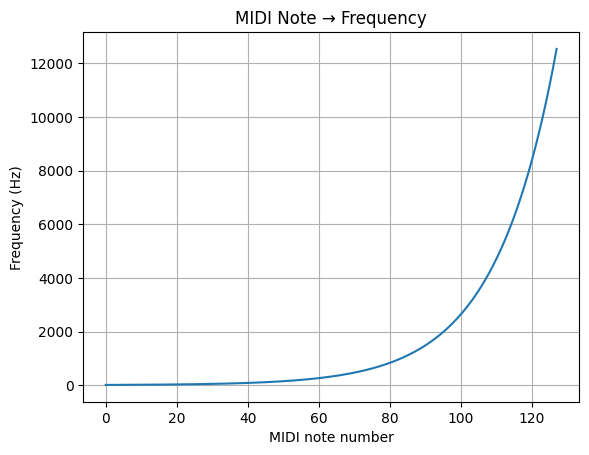

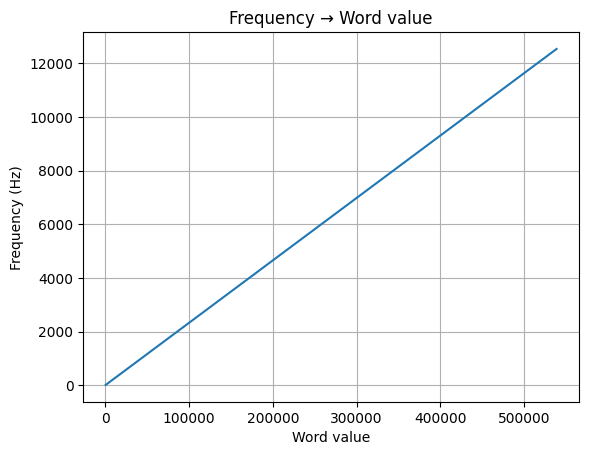

In [17]:
note_freqs = [0.0] * MIDI_RANGE
for i in range(MIDI_RANGE):
    exponent = (i - 69) / 12
    note_freqs[i] = 440*np.power(2,exponent)

pa_words = [0] * MIDI_RANGE 
for i in range(MIDI_RANGE):
    pa_words[i] = (note_freqs[i]*2**N_PA)/F_CLK

# plot midi note to frequency
notes = np.arange(len(note_freqs))
plt.figure()
plt.plot(notes, note_freqs)
plt.xlabel("MIDI note number")
plt.ylabel("Frequency (Hz)")
plt.title("MIDI Note → Frequency")
plt.grid(True)
plt.show()

# plot frequency to word value
plt.figure()
plt.plot(pa_words, note_freqs)
plt.xlabel("Word value")
plt.ylabel("Frequency (Hz)")
plt.title("Frequency → Word value")
plt.grid(True)
plt.show()

### Look-Up Table (LUT) Construction
The following table uses a sine wave. The values stored in the table are given by:
$y_k = sin(2\pi k/N)$ where k is an intger between 0 and N where N is $2^{LUT\_SZ}$

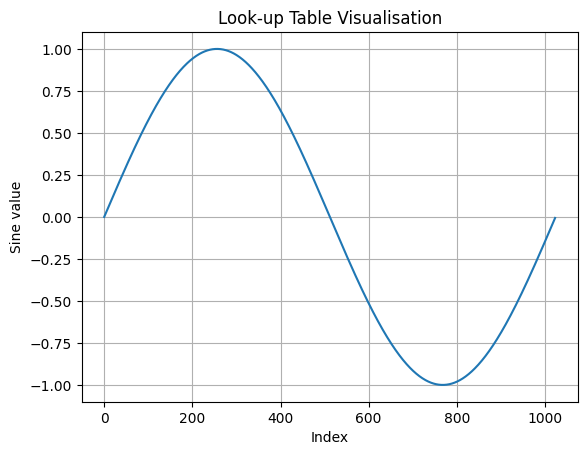

In [ ]:
N = 1<<LUT_BITS
sin_lut = [0.0] * LUT_BITS

k = np.arange(N)
sin_lut = np.sin(2 * np.pi * k / N)

plt.figure()
plt.plot(k, sin_lut)
plt.xlabel("Index")
plt.ylabel("Sine value")
plt.title("Look-up Table Visualisation")
plt.grid(True)
plt.show()

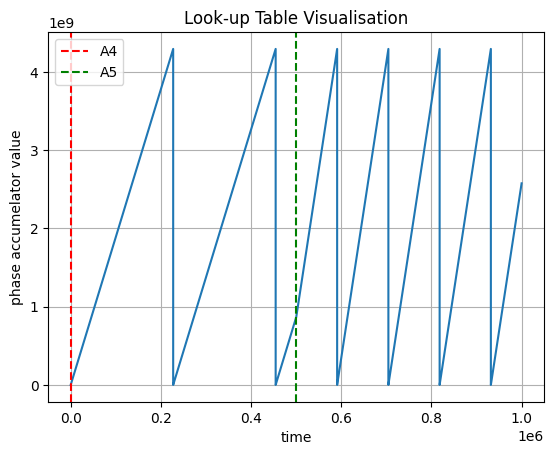

In [46]:
### Phase accumulator
def phase_accumulator(previous_value, midi_note):
    return (previous_value + pa_words[midi_note])%(1<<N_PA)

NUM_SAMPLES = 1000000
time = np.arange(NUM_SAMPLES) 
simulated_values = [0] * NUM_SAMPLES



for i in range(NUM_SAMPLES//2):
    if i > 0 :
        simulated_values[i] = phase_accumulator(simulated_values[i-1], A4)
    else:
        simulated_values[i] = phase_accumulator(0,A4)


for i in range(NUM_SAMPLES//2):
    simulated_values[i+NUM_SAMPLES//2] = phase_accumulator(simulated_values[(i+NUM_SAMPLES//2)-1], A4+12)

# plot frequency to word value
plt.figure()
plt.plot(time, simulated_values)
plt.xlabel("time")
plt.ylabel("phase accumelator value")
plt.axvline(x=0, color='r', linestyle='--', label='A4')
plt.axvline(x=NUM_SAMPLES//2, color='g', linestyle='--', label='A5')
plt.title("Look-up Table Visualisation")
plt.grid(True)
plt.legend()
plt.show()
